<a href="https://colab.research.google.com/github/drskprabhakar/AI-ML-DL-colab-notebooks-coding-models/blob/main/30724_DCR_thesis_fddt_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl

In [6]:
df = openpyxl.load_workbook('/content/drive/MyDrive/FDDT AUC (2).xlsx')
df.sheetnames

['Postop ext DCR 3 month FDDT', 'Post op Endo DCR 3 months FDDT']

In [9]:
extfddt3months = pd.read_excel('/content/drive/MyDrive/FDDT AUC (2).xlsx', sheet_name='Postop ext DCR 3 month FDDT')
extfddt3months.columns

Index(['Ext_DCR(Post op 3 months_OA )', 'Post op 3month FDDT (Ext)'], dtype='object')

In [15]:
x = extfddt3months.drop(['Post op 3month FDDT (Ext)'], axis=1).values
y = extfddt3months['Post op 3month FDDT (Ext)'].values

In [14]:
x

array([[ 96.75  ],
       [ 85.05  ],
       [128.7   ],
       [ 47.52  ],
       [ 41.    ],
       [ 63.6424],
       [ 90.    ],
       [ 95.    ],
       [ 87.12  ],
       [118.58  ],
       [ 63.    ],
       [ 77.7   ],
       [ 75.6   ],
       [ 63.6424],
       [ 72.    ],
       [ 63.6424],
       [ 68.34  ],
       [ 63.6424],
       [ 75.6   ],
       [ 63.6424],
       [ 63.6424],
       [ 40.7   ],
       [132.6   ],
       [107.8   ],
       [ 88.    ]])

In [16]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1])

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [23]:
x_train,x_test,y_train,y_test

(array([[ 75.6   ],
        [ 75.6   ],
        [ 63.6424],
        [ 87.12  ],
        [132.6   ],
        [ 63.6424],
        [ 47.52  ],
        [ 85.05  ],
        [ 77.7   ],
        [ 68.34  ],
        [118.58  ],
        [ 63.6424],
        [ 63.6424],
        [ 90.    ],
        [ 40.7   ],
        [ 96.75  ],
        [ 63.6424],
        [ 88.    ],
        [ 63.6424],
        [ 41.    ]]),
 array([[ 95. ],
        [ 72. ],
        [107.8],
        [128.7],
        [ 63. ]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0]),
 array([1, 1, 1, 1, 1]))

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [20]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1])

In [21]:
y_pred[y_pred<=0.5]=0
y_pred[y_pred>0.5]=1

In [22]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[5]])

In [27]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [40]:
import openpyxl
df = openpyxl.load_workbook('/content/drive/MyDrive/FDDT AUC.xlsx')
df.sheetnames

['Fddt']

In [41]:
df1 = pd.read_excel('/content/drive/MyDrive/FDDT AUC.xlsx', sheet_name='Fddt')
df1.columns

Index(['test1', 'passed', 'test2', 'passed.1'], dtype='object')

In [42]:
X_train = df1[['test1']]  # Features from dataset 1
y_train = df1['passed']   # Target variable from dataset 1

X_test = df1[['test2']]   # Features from dataset 2
y_test = df1['passed']    # Target variable from dataset 2

In [43]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [64]:
X_train = df1[['test1']]  # Features for training
y_train = df1['passed']   # Target for training

X_test = df1[['test1']]   # Use the same feature name 'test1' for testing
y_test = df1['passed']    # Target for testing

model1 = LogisticRegression()
model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)  # Now prediction should work


In [65]:
model1.score(X_test, y_test)

1.0

In [66]:
X_train = df1[['test2']]  # Features for training
y_train = df1['passed']   # Target for training

X_test = df1[['test2']]   # Use the same feature name 'test1' for testing
y_test = df1['passed']    # Target for testing

model2 = LogisticRegression()
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)  # Now prediction should work

In [63]:
model2.score(X_test, y_test)

0.92

In [67]:
metrics.confusion_matrix(y_test, y_pred1)

array([[ 2,  0],
       [ 0, 23]])

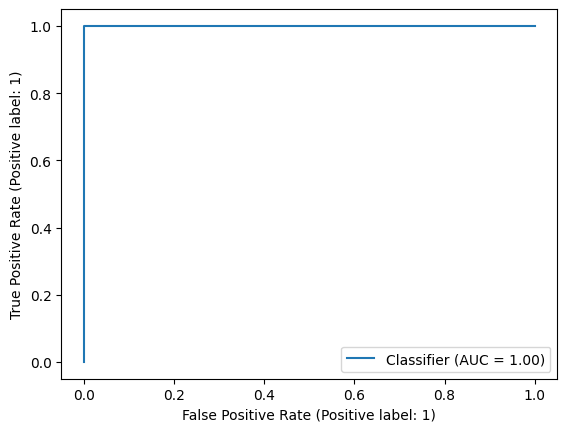

In [69]:
metrics.RocCurveDisplay.from_predictions(y_test, y_pred1)

In [68]:
metrics.confusion_matrix(y_test, y_pred2)

array([[ 0,  2],
       [ 0, 23]])

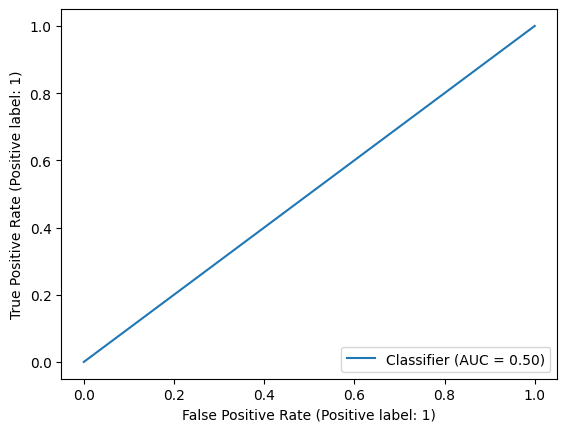

In [70]:
metrics.RocCurveDisplay.from_predictions(y_test, y_pred2)